Text(0.5, 1.0, 'Zoom')

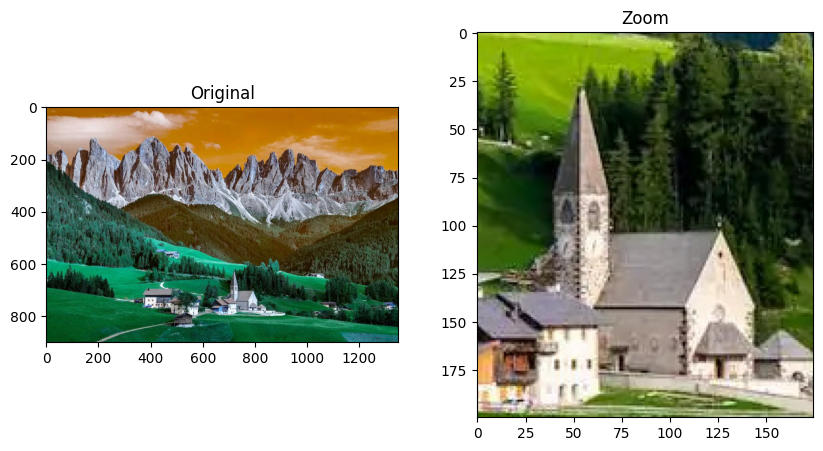

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,5]

img_cancerbgr = cv2.imread(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/Simulcro.jpg")
imagen = cv2.cvtColor(img_cancerbgr,cv2.COLOR_BGR2RGB)

celula_cancer = imagen[600:800,665:840,:] #Guardo imagen recortada
plt.imsave("Turip.jpg", celula_cancer)


plt.subplot(1,2,1)
plt.imshow(img_cancerbgr)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(imagen[600:800,665:840,:]) #muestro imgaen recortada
plt.title("Zoom")

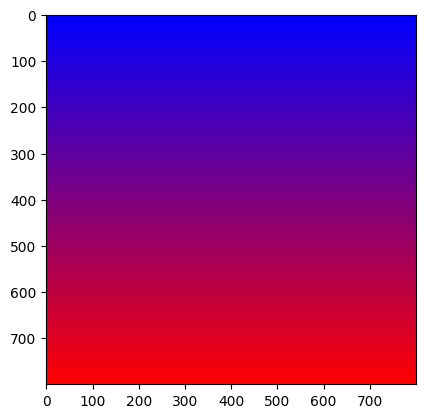

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

width = 800
height = 800
square = 100

gradient = np.zeros((height, width, 3), dtype=np.uint8) #Le doy los parametros a la imagen

for i in range(width):
    gradient[i, :] = [i * 255 // width, 0, 255 - i * 255 // width] #Genero el degradado
 
plt.imsave("Degradado.jpg", gradient) #Guardo el degradado para un ej
plt.imshow(gradient)
plt.show()

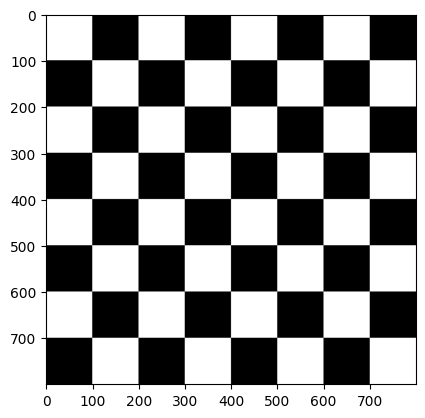

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

color = [0,0,0]
filas, columnas = 800, 800 #Declaro el tamaño del tablero
nI = filas/8
nJ = columnas/8
img = np.ones((filas, columnas, 3)) #A la imagen le doy el tamaño del tablero



def pintar(img,x0,x1,y0,y1,color):
    for x in range(int(x0),int(x1)):
        for y in range(int(y0),int(y1)):
            img[x][y] = np.array(color) #Funcion que recibe las dimensiones y el color

for i in range(8):
    for j in range(8):
        if (i+j)%2==1: #Se verifica si es par mas que nada para pintar intercaladamente
            pintar(img,i*nI,(i+1)*nI,j*nJ,(j+1)*nJ,color) #Se llama a la funcion para pintar el tablero


plt.imshow(img)
plt.show()

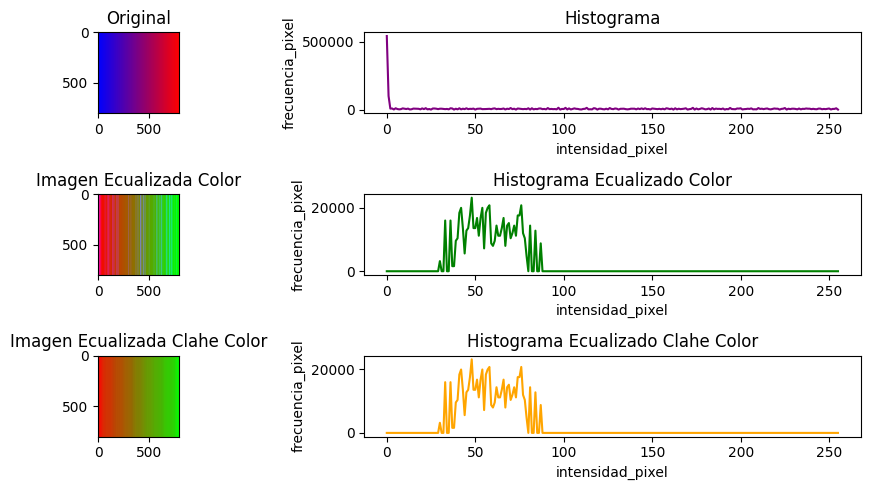

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Universidad\QuintoSemestre\PDI\Imagenes\degradado.jpg', 1)
clahe =  cv.createCLAHE(clipLimit= 2.0, tileGridSize= (8, 8))

img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #Escala grises
img_nueva = clahe.apply(img_gris) #Aplic clahe
histograma = np.histogram(img, 256, [0, 256]) #Creo histograma




red, green, blue = cv.split(img)

contraste_blue = clahe.apply(red) 
contraste_red =  clahe.apply(green)
contraste_green = clahe.apply(blue)
finImgClahe = cv.merge((contraste_red, contraste_green, contraste_blue)) #Junto los 3 contrastes
histograma_clahe = np.histogram(img_nueva, 256, [0, 256])


contraste_blue = cv.equalizeHist(red)
contraste_red =  cv.equalizeHist(green)
contraste_green = cv.equalizeHist(blue)
finImgEcua = cv.merge((contraste_red, contraste_green, contraste_blue)) #Junto los 3 contrastes
histograma_ecua = np.histogram(img_nueva, 256, [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(3, 2, 1)
plt.title('Original')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


plt.subplot(3, 2, 2)
plt.plot(histograma[0], color='purple')
plt.title('Histograma')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')


plt.subplot(3, 2, 3)
plt.title('Imagen Ecualizada Color')
plt.imshow(cv.cvtColor(finImgEcua, cv.COLOR_BGR2RGB))

plt.subplot(3, 2, 4)
plt.plot(histograma_ecua[0], color='green')
plt.title('Histograma Ecualizado Color')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')


plt.subplot(3, 2, 5)
plt.title('Imagen Ecualizada Clahe Color')
plt.imshow(cv.cvtColor(finImgClahe, cv.COLOR_BGR2RGB))


plt.subplot(3, 2, 6)
plt.plot(histograma_clahe[0], color='orange')
plt.title('Histograma Ecualizado Clahe Color')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixels')

plt.tight_layout()
plt.show()